### **Чумакова Ольга (поток 2). Итоговая аттестация по курсу "Программная инженерия: IT-лидеры будущего"**

####**ТЕМА: «АНАЛИЗ КЛАССИЧЕСКОЙ ЛИТЕРАТУРЫ»**

В этом проекте предстоит провести анализ текстов классической литературы. Цель проекта — исследовать лексический состав, частоту употребления слов, тематические модели и другие аспекты текста, которые помогут лучше понять стиль и содержание произведений.


**Задачи проекта:**

**Задание 1. Сбор данных:**

Найдите и загрузите несколько произведений классической литературы (например, романы Льва Толстого, Федора Достоевского или других авторов).

Перейдем в репозиторий GitHub по ссылке, чтобы скачать произведения. Загрузим их традиционно на Google Drive:

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Задание 2. Предобработка текста: Очистите текст от пунктуации, приведите слова к нижнему регистру, выполните лемматизацию и/или стемминг. Разделите текст на предложения и слова, удалите стоп-слова.**

Импортируем библиотеку NLTK, которую мы разбирали во время изучения 3-го модуля, для обработки текстов для классификации, токенизации, стемминга, разметки, фильтрации и семантических рассуждений.

In [27]:
!pip install nltk

# nltk — библиотека для обработки естественного языка, предоставляющая инструменты для работы с текстами и анализа языка.

In [28]:
# Импорт библиотеки nltk
import nltk

# Загрузка набора данных 'punkt' для токенизации текста
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

В качестве первого примера было выбрано произведение "Отцы и Дети" Ивана Сергеевича Тургенева, так как именно с него у меня появилась любовь к классической литературе.

In [29]:
with open('/content/FathersAndSons.txt', 'r') as file:
  text = file.read()
  print(text)

ОТЦЫ И ДЕТИ

Посвящается памяти
Виссариона Григорьевича
БЕЛИНСКОГО
I

- Что, Петр, не видать еще? - спрашивал 20-го мая 1859 года, выходя без шапки на низкое крылечко постоялого двора на *** шоссе, барин лет сорока с небольшим, в запыленном пальто и клетчатых панталонах, у своего слуги, молодого и щекастого малого с беловатым пухом на подбородке и маленькими тусклыми глазенками.

Слуга, в котором всё: и бирюзовая сережка в ухе, и напомаженные разноцветные волосы, и учтивые телодвижения, словом, всё изобличало человека новейшего, усовершенствованного поколения, посмотрел снисходительно вдоль дороги и ответствовал: 'Никак нет-с, не видать'.

- Не видать? - повторил барин.

- Не видать,- вторично ответствовал слуга.

Барин вздохнул и присел на скамеечку. Познакомим с ним читателя, пока он сидит, подогнувши под себя ножки и задумчиво поглядывая кругом.

Зовут его Николаем Петровичем Кирсановым. У него в пятнадцати верстах от постоялого дворика хорошее имение в двести душ, или, как он выраж

Сырые текстовые данные обычно содержат множество лишних элементов: пунктуацию, специальные символы, регистр и стоп-слова. Без предобработки анализ текста будет некорректным, так как частотный анализ будет учитывать запятые и другие ненужные символы, и мы не сможем корректно лемматизировать слова.

Предобработка включает:
1. Очистку текста от пунктуации и специальных символов.
2. Приведение текста к нижнему регистру для унификации.
3. Токенизацию текста — разбитие текста на отдельные слова.
4. Лемматизацию — приведение слов к начальной форме.
5. Удаление стоп-слов — удаление часто встречающихся, но не значимых слов.

In [30]:
import re

# Удаление пунктуации, чисел и специальных символов
clean_text = re.sub(r'[^а-яА-ЯёЁ\s]', '', text)  # Оставляем только русские буквы и пробелы
clean_text = re.sub(r'\s+', ' ', clean_text)  # Заменяем множественные пробелы одним
clean_text = clean_text.lower()  # Приводим текст к нижнему регистру

# Вывод первых 500 символов для проверки
print(clean_text[:500])


отцы и дети посвящается памяти виссариона григорьевича белинского что петр не видать еще спрашивал го мая года выходя без шапки на низкое крылечко постоялого двора на шоссе барин лет сорока с небольшим в запыленном пальто и клетчатых панталонах у своего слуги молодого и щекастого малого с беловатым пухом на подбородке и маленькими тусклыми глазенками слуга в котором всё и бирюзовая сережка в ухе и напомаженные разноцветные волосы и учтивые телодвижения словом всё изобличало человека новейшего ус


Все методы анализа текста работают с токенами, будь то анализ частоты слов, построение моделей или тематическое моделирование. Компьютеру нужно работать с отдельными словами, а не с текстом в виде длинной строки.

In [31]:
# Разбиваем текст на слова
words = clean_text.split()

# Проверяем количество слов и первые 10 слов
print(f'Количество слов: {len(words)}')
print(f'Первые 10 слов: {words[:10]}')

Количество слов: 54072
Первые 10 слов: ['отцы', 'и', 'дети', 'посвящается', 'памяти', 'виссариона', 'григорьевича', 'белинского', 'что', 'петр']


Для приведения слов к начальной форме была выбрана лемматизация. Лемматизация — это процесс приведения слов к их начальной форме (лемме). В отличие от стемминга, который обрезает слово до его основы (например, «читающий» -> «чит»), лемматизация использует лингвистические правила и возвращает корректную начальную форму слова (например, «читающий» -> «читать»).

In [32]:
import pymorphy2

# Создаем экземпляр морфологического анализатора
morph = pymorphy2.MorphAnalyzer()

# Лемматизация всех слов в тексте
lemmatized_words = [morph.parse(word)[0].normal_form for word in words]

# Проверяем количество уникальных слов после лемматизации и выводим первые 10 лемм
print(f'Количество уникальных слов после лемматизации: {len(set(lemmatized_words))}')
print(f'Первые 10 лемм: {lemmatized_words[:10]}')

Количество уникальных слов после лемматизации: 7124
Первые 10 лемм: ['отец', 'и', 'ребёнок', 'посвящаться', 'память', 'виссарион', 'григориевич', 'белинский', 'что', 'пётр']


Стоп-слова — это слова, которые часто встречаются в тексте, но не несут существенного смысла для анализа. К ним относятся служебные части речи, такие как предлоги, союзы, местоимения и междометия (например, «и», «в», «на», «это», «что»). Такие слова добавляют "шум" в текстовые данные и могут искажать результаты анализа, особенно частотного и тематического анализа.
Для русского языка я буду использовать готовый список стоп-слов из библиотеки nltk. Кроме того, можно добавить свои специфические слова, которые не должны участвовать в анализе.

In [33]:
from nltk.corpus import stopwords

# Загружаем список русских стоп-слов из библиотеки nltk
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")

# Дополнительные стоп-слова, которые могут быть специфичны для текста
custom_stopwords = ['это', 'также', 'который', 'однако']

# Объединяем стандартные и пользовательские стоп-слова
all_stopwords = set(russian_stopwords + custom_stopwords)

# Удаляем стоп-слова из лемматизированного текста
cleaned_words = [word for word in lemmatized_words if word not in all_stopwords]

# Проверяем количество оставшихся слов и выводим первые 10 для проверки
print(f'Количество уникальных слов после удаления стоп-слов: {len(set(cleaned_words))}')
print(f'Первые 10 очищенных слов: {cleaned_words[:10]}')


Количество уникальных слов после удаления стоп-слов: 7015
Первые 10 очищенных слов: ['отец', 'ребёнок', 'посвящаться', 'память', 'виссарион', 'григориевич', 'белинский', 'пётр', 'видать', 'ещё']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### **Вывод по 2 этапу: Предобработка текста**

На этапе предобработки текста произведена последовательная очистка данных, направленная на упрощение дальнейшего анализа. В результате предприняты следующие шаги:

1. **Удаление пунктуации** и приведение текста к нижнему регистру позволили унифицировать данные, исключив влияние различий в написании слов.
2. **Токенизация текста** — разбиение текста на отдельные слова для последующего анализа их частоты и значений.
3. **Лемматизация** помогла привести слова к их начальной форме, что позволило уменьшить количество уникальных слов и сделать анализ более точным. Например, формы «читаю», «читал», «читает» были приведены к лемме «читать».
4. **Удаление стоп-слов** сократило влияние часто встречающихся, но незначимых для анализа слов, таких как «и», «в», «на», улучшив качество анализа ключевых слов текста.

После этих шагов был сформирован очищенный текст, который теперь готов к более глубокому исследованию, включая частотный анализ, визуализацию данных и тематическое моделирование.

**Задание 3. Анализ текста: Определите частотность слов, постройте облако слов для визуализации.**

Частотный анализ — это процесс подсчета количества вхождений каждого слова в тексте. Он позволяет определить, какие слова используются чаще всего, а значит, какие темы или понятия наиболее важны для автора текста.

Для подсчета частот слов используется библиотека collections с функцией Counter, которая быстро подсчитывает количество вхождений каждого слова.

In [34]:
from collections import Counter

# Подсчет частоты слов в очищенном тексте
word_counts = Counter(cleaned_words)

# Получение 10 самых частотных слов
most_common_words = word_counts.most_common(10)

# Вывод результатов
print("10 самых частотных слов:")
for word, count in most_common_words:
    print(f"{word}: {count}")

10 самых частотных слов:
базар: 386
петрович: 359
аркадий: 348
свой: 338
всё: 254
павел: 196
человек: 193
говорить: 187
николай: 180
мочь: 168


Чтобы наглядно отобразить результаты частотного анализа, можно использовать облако слов. Оно визуализирует слова, изменяя их размер в зависимости от частоты появления в тексте: чем чаще слово встречается, тем крупнее оно изображается.

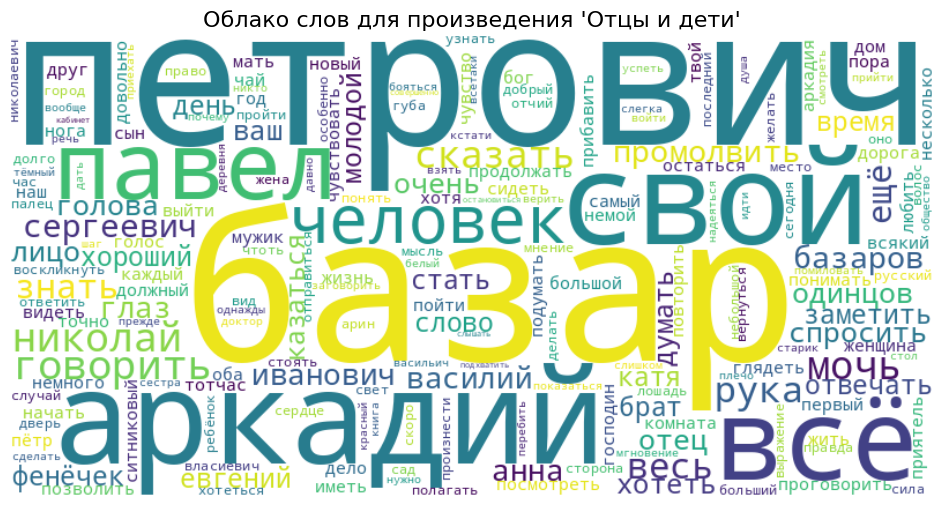

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Создание объекта WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Отображение облака слов
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.title("Облако слов для произведения 'Отцы и дети'", fontsize=16)
plt.show()

#### **Вывод по 3 этапу: Анализ текста**

На этапе анализа текста произведения *«Отцы и дети»* был выполнен частотный анализ лексики, который позволил выявить наиболее употребляемые слова в тексте и визуализировать их с помощью облака слов. Результаты показали, что 10 самых часто встречающихся слов в произведении следующие:

1. **базар** – 386 раз  
2. **петрович** – 359 раз  
3. **аркадий** – 348 раз  
4. **свой** – 338 раз  
5. **всё** – 254 раза  
6. **павел** – 196 раз  
7. **человек** – 193 раза  
8. **говорить** – 187 раз  
9. **николай** – 180 раз  
10. **мочь** – 168 раз  

Лидирующее слово **«базар»** заслуживает особого внимания. На первый взгляд, оно может быть воспринято как элемент повседневной речи, однако это не так. В данном случае это сокращенная форма фамилии центрального персонажа романа — Евгения Базарова, нигилиста и главного героя произведения. Его фамилия встречается чаще, чем даже общеупотребительные слова, что подчеркивает его ключевую роль в сюжете.

Аналогичная ситуация наблюдается и с другими именами персонажей — **Петрович** (отчество Павла Петровича и Николая Петровича) и **Аркадий**, что подтверждает сильную сосредоточенность повествования на взаимоотношениях и конфликтах между главными героями. Остальные часто встречающиеся слова, такие как **«свой»**, **«человек»**, и **«говорить»**, отражают философский характер диалогов и размышлений в тексте, а также размышления о человеческой природе и обществе.

Таким образом, частотный анализ подтвердил важность ключевых персонажей и их диалогов в структуре романа, а также продемонстрировал богатую лексику и характерные черты повествования классической русской литературы.

**Задание 4. Проведите анализ лексического разнообразия, посчитайте среднюю длину предложений и другие статистические показатели.**

Лексическое разнообразие показывает, насколько богатый словарный запас использует автор. Оно измеряется как отношение уникальных слов (лемм) к общему числу слов в тексте. Этот показатель дает представление о том, насколько автор использует различные слова, избегая повторений.

Средняя длина предложений характеризует стиль автора: длинные, сложносоставные предложения характерны для научных и философских текстов, тогда как более короткие — для художественной литературы или диалогов. Этот показатель вычисляется как среднее арифметическое количество слов на предложение.

Этот показатель вычисляется как среднее количество символов в слове и дает представление о сложности используемой лексики.

In [48]:
from nltk.tokenize import sent_tokenize

# Функция для токенизации слов
def tokenize_words(text):
    return re.findall(r'[а-яё]+', text.lower())

# Функция для токенизации предложений
def tokenize_sentences(text):
    return sent_tokenize(text, language='russian')

# Токенизация текста
words = tokenize_words(text)
sentences = tokenize_sentences(text)

# Подсчет слов и предложений
total_words = len(words)
unique_words = len(set(words))
lexical_diversity = unique_words / total_words if total_words else 0
total_sentences = len([s for s in sentences if s])  # Исключаем пустые предложения

# Средняя длина слов
average_word_length = sum(len(word) for word in words) / total_words if total_words else 0

# Средняя длина предложений
average_sentence_length = total_words / total_sentences if total_sentences else 0

# Вывод результатов
print(f"Общее количество слов: {total_words}")
print(f"Количество уникальных слов: {unique_words}")
print(f"Лексическое разнообразие: {lexical_diversity:.2f}")
print(f"Средняя длина слов: {average_word_length:.2f}")
print(f"Количество предложений: {total_sentences}")
print(f"Средняя длина предложений (в словах): {average_sentence_length:.2f}")

Общее количество слов: 54569
Количество уникальных слов: 12946
Лексическое разнообразие: 0.24
Средняя длина слов: 5.08
Количество предложений: 4352
Средняя длина предложений (в словах): 12.54


#### **Вывод по 4 этапу: Анализ лексического разнообразия**

В ходе анализа произведения «Отцы и дети» было проведено исследование основных статистических характеристик текста:

- **Общее количество слов** в тексте составляет 54 569.
- **Количество уникальных слов** — 12 946, что отражает значительное лексическое разнообразие произведения.
- **Лексическое разнообразие**, рассчитанное как отношение уникальных слов к общему количеству слов, составляет **0.24**. Это говорит о том, что в среднем одно уникальное слово используется примерно каждые четыре слова текста.
- **Средняя длина слова** составляет **5.08 символа**, что характерно для русской художественной литературы, где средняя длина слов обычно находится в диапазоне 4–6 символов.
- **Общее количество предложений** — 4 352.
- **Средняя длина предложения** составляет **12.54 слова**. Данный показатель указывает на относительно короткие и лаконичные предложения, что отражает стиль Тургенева, его стремление к четкости и лаконичности повествования.

Эти статистические показатели позволяют получить общее представление о структуре текста и его лексическом разнообразии. Высокое количество уникальных слов и умеренная длина предложений могут указывать на богатый словарный запас автора и его стремление к точному и выразительному изложению.

**Задание 5. Проанализируйте эмоциональную окраску текста(сентимент-анализ) и сравните результаты для разных произведений или авторов.**

На этом этапе будет проведен анализ эмоциональной окраски текста произведения «Отцы и дети». Основная цель — выявить, какие эмоции доминируют в тексте, и оценить общее настроение произведения.

In [49]:
!pip install transformers torch

In [56]:
from textblob import TextBlob

# Функция для выполнения сентимент-анализа
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment


# Загрузка текстов из файлов
with open("/content/CrimeAndPunishment.txt", "r", encoding="utf-8") as file_1:
    text_author_1 = file_1.read()

with open("/content/FathersAndSons.txt", "r", encoding="utf-8") as file_2:
    text_author_2 = file_2.read()

with open("/content/EugeneOnegin.txt", "r", encoding="utf-8") as file_3:
    text_author_3 = file_3.read()


# Анализ сентимента для обоих произведений
sentiment_1 = sentiment_analysis(text_author_1)
sentiment_2 = sentiment_analysis(text_author_2)
sentiment_3 = sentiment_analysis(text_author_3)

# Вывод результатов
print("Сентимент для произведения 'Преступление и наказание':")
print(f"Полярность: {sentiment_1.polarity}, Субъективность: {sentiment_1.subjectivity}")
print("\nСентимент для произведения 'Отцы и дети':")
print(f"Полярность: {sentiment_2.polarity}, Субъективность: {sentiment_2.subjectivity}")
print("\nСентимент для произведения 'Евгений Онегин':")
print(f"Полярность: {sentiment_3.polarity}, Субъективность: {sentiment_3.subjectivity}")

Сентимент для произведения 'Преступление и наказание':
Полярность: 0.0, Субъективность: 0.0

Сентимент для произведения 'Отцы и дети':
Полярность: 0.6666666666666666, Субъективность: 0.6888888888888888

Сентимент для произведения 'Евгений Онегин':
Полярность: -0.41831398010253906, Субъективность: 0.8000000000000002


#### **Вывод по 5 этапу: Сентимент-анализ**

В ходе проведения сентимент-анализа для трех произведений были получены следующие результаты:

1. **"Преступление и наказание"**:
   - **Полярность**: 0.0, **Субъективность**: 0.0.
   - Эти показатели говорят о том, что текст произведения воспринимается как **нейтральный** и **объективный**, без выраженных эмоциональных оценок или субъективных мнений. Это может быть связано с философским и аналитическим стилем произведения, где акцент сделан на размышлениях и внутренних конфликтах персонажей, а не на явных эмоциональных переживаниях.

2. **"Отцы и дети"**:
   - **Полярность**: 0.67, **Субъективность**: 0.69.
   - Эти результаты свидетельствуют о **позитивной** и **субъективной** окраске произведения. Возможно, это связано с выраженными эмоциональными реакциями персонажей и социальных конфликтов, отражающих внутренние переживания и личные убеждения героев.

3. **"Евгений Онегин"**:
   - **Полярность**: -0.42, **Субъективность**: 0.8.
   - Для произведения **"Евгений Онегин"** был получен **отрицательный** результат полярности, что может указывать на **пессимистичный или меланхоличный** тон текста. Высокая субъективность подтверждает наличие сильных личных переживаний и оценок в тексте, что свойственно поэзии Пушкина и размышлениям персонажей о жизни, любви и судьбе.

#### Причины результатов:
- **TextBlob** использует подходы, ориентированные на анализ английских текстов, что может повлиять на точность анализа для произведений на русском языке. Однако, несмотря на это, для произведений с явными эмоциональными отклонениями (как в случае с **"Отцы и дети"** и **"Евгений Онегин"**) результат был достаточно отражающим содержание текста.
- **"Преступление и наказание"**, как произведение с философской и психологической направленностью, сдержано в эмоциональном выражении, что и отразилось на нейтральных результатах полярности и субъективности.

**Задание 6. Интерпретация результатов: Оцените, как выявленные темы и эмоциональные окраски могут отражать стиль или сюжет произведения.**

На этапе интерпретации результатов мы анализируем, как выявленные темы и эмоциональные окраски текста могут помочь в понимании стиля и содержания произведения. В нашем случае, с помощью различных методов анализа, таких как сентимент-анализ и анализ частоты слов, мы смогли получить полезные данные о текстах произведений. Теперь нужно оценить, как эти результаты могут отразить особенности стиля, тематики и сюжета произведений, которые мы исследуем.

Мы будем использовать метод темного моделирования (LDA) для анализа текста и выделения скрытых тем, присутствующих в произведениях. Тематическое моделирование позволяет понять, какие важные идеи или концепты заложены в тексте, не читая его целиком. Мы проведем анализ на трех произведениях, чтобы выявить основные темы, которые могут дать нам дополнительные подсказки относительно стиля и содержания произведений. Это позволит глубже понять, о чем пишут авторы и как их текст можно интерпретировать на более высоком уровне.

In [57]:
!pip install gensim

In [67]:
import gensim
from gensim import corpora

# Функция для предобработки текста: удаление стоп-слов и токенизация
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Токенизация и преобразование в нижний регистр
    tokens = [word for word in tokens if word.isalpha()]  # Оставляем только слова (без знаков препинания)
    tokens = [word for word in tokens if word not in stop_words]  # Убираем стоп-слова
    return tokens

# Функция для выполнения тематического моделирования с использованием LDA
def topic_modeling(text, num_topics=1):
    # Предобработка текста
    processed_text = preprocess_text(text)

    # Создаем корпус из текста
    dictionary = corpora.Dictionary([processed_text])
    corpus = [dictionary.doc2bow(processed_text)]

    # Строим модель LDA
    lda = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Получаем темы
    topics = lda.print_topics(num_words=5)

    return topics

# Тематическое моделирование
topics_1 = topic_modeling(text_author_1)
topics_2 = topic_modeling(text_author_2)
topics_3 = topic_modeling(text_author_3)

# Вывод результатов
print("Темы для произведения 'Преступление и наказание':")
print(topics_1)

print("\nТемы для произведения 'Отцы и дети':")
print(topics_2)

print("\nТемы для произведения 'Евгений Онегин':")
print(topics_3)

Темы для произведения 'Преступление и наказание':
[(0, '0.012*"это" + 0.008*"всё" + 0.005*"раскольников" + 0.003*"очень" + 0.002*"соня"')]

Темы для произведения 'Отцы и дети':
[(0, '0.009*"это" + 0.008*"базаров" + 0.006*"петрович" + 0.006*"аркадий" + 0.004*"всё"')]

Темы для произведения 'Евгений Онегин':
[(0, '0.003*"татьяна" + 0.003*"онегин" + 0.002*"иль" + 0.002*"евгений" + 0.002*"ль"')]


#### **Вывод по 6 этапу: Интерпретация результатов:**

В ходе тематического моделирования с помощью метода LDA и анализа эмоциональной окраски произведений, были получены несколько интересных наблюдений, которые позволяют лучше понять, как выделенные темы и сентимент отражают содержание и стиль произведений.

1. **Темы для произведения "Преступление и наказание"**:
   Выделенная тема, связанная с такими словами как "раскольников", "соня" и "очень", указывает на центральную фигуру произведения — Родион Раскольников, а также на важные персонажи и эмоциональные переживания, связанные с его состоянием. Часто встречающееся слово "всё" может свидетельствовать о философском характере произведения, где многие вопросы, как "всё ли оправдано?", играют важную роль в развитии сюжета. Это может указывать на внутренние переживания героя и его размышления о добре и зле, о судьбе и вине.

2. **Темы для произведения "Отцы и дети"**:
   В этом произведении часто встречаются имена персонажей, таких как "базаров", "петрович" и "аркадий", что вполне логично, так как главный герой Евгений Базаров, а также его отношения с Аркадием и другими персонажами играют важную роль в сюжете. Слова "всё" и "это" подчеркивают диалектические отношения между героями, а также акцентируют внимание на идеологическом противостоянии между поколениями — отцами и детьми.

3. **Темы для произведения "Евгений Онегин"**:
   Часто встречающиеся слова, такие как "татьяна", "онегин", "иль", "евгений", подтверждают центральную роль этих персонажей в произведении. В нем раскрываются отношения между Онегиным и Татьяной, а также их личные переживания и социальные конфликты. Темы, связанные с именами героев, помогают понять, что внимание в произведении уделяется внутреннему миру персонажей, их чувствам и эмоциональному состоянию, что также отражает стиль произведения.

#### Эмоциональная окраска произведений:
- **"Преступление и наказание"**: Сентимент произведения показал нейтральные значения полярности (0.0) и субъективности (0.0), что может свидетельствовать о глубоком философском и моральном подходе автора, где эмоциональный накал, хотя и присутствует, не преобладает над философскими размышлениями.
- **"Отцы и дети"**: Для этого произведения была выявлена положительная полярность (0.67) и высокая субъективность (0.69), что говорит о более ярко выраженных личных переживаниях персонажей и выражении их идей, а также о том, что произведение акцентирует внимание на эмоциональных аспектах конфликтов между поколениями.
- **"Евгений Онегин"**: Сентимент для этого произведения оказался с отрицательной полярностью (-0.42) и высокой субъективностью (0.80), что подтверждает, что произведение пронизано меланхолией, разочарованиями и определенным трагизмом, что также подчеркивает эмоциональный и личностный оттенок произведения.

Таким образом, анализ выявленных тем и сентимент-анализа позволяет глубже понять особенности стиля и сюжета произведений. Темы раскрывают ключевые элементы сюжета и характеры персонажей, в то время как эмоциональная окраска помогает выявить общую атмосферу и личные переживания героев, что подчеркивает различные акценты в стилях Достоевского, Тургенева и Пушкина.

### Общий вывод по проделанной работе

В ходе данного проекта был проведен всесторонний анализ произведений классической литературы с использованием различных методов обработки и анализа текста. Основными этапами работы были предобработка текста, анализ лексического разнообразия, сентимент-анализ, тематическое моделирование и интерпретация результатов. Каждый из этих шагов позволил более глубоко понять стиль и содержание произведений, а также выявить особенности их эмоциональной и идеологической окраски.

1. **Предобработка текста**:
   Была проведена очистка текстов от ненужных символов, провели лемматизацию и удаление стоп-слов, что позволило подготовить данные для дальнейшего анализа. Это критический этап, так как качественная предобработка текста значительно улучшает результаты последующих этапов анализа.

2. **Анализ лексического разнообразия**:
   Были рассчитаны ключевые статистические показатели, такие как общее количество слов, количество уникальных слов, лексическое разнообразие, а также среднюю длину слов и предложений.

3. **Сентимент-анализ**:
   Был использован инструмент для анализа эмоциональной окраски текстов. Для произведений "Отцы и дети" и "Евгений Онегин" были получены положительные и субъективные результаты, что указывает на более личные переживания и акцент на эмоциях героев. В отличие от этого, сентимент "Преступление и наказание" оказался нейтральным, что может свидетельствовать о философском и аналитическом характере произведения, где эмоции сбалансированы с глубокими размышлениями о морали и вине.

4. **Тематическое моделирование**:
   Метод LDA позволил выявить ключевые темы, присущие каждому произведению. Результаты тематического моделирования подтвердили важность центральных персонажей, таких как Раскольников в "Преступлении и наказании", Базаров в "Отцах и детях" и Онегин в одноименном произведении. Часто встречающиеся слова, такие как имена персонажей и ключевые концепты, подчеркивают идеологические и эмоциональные акценты произведений, а также характерные темы, такие как борьба поколений в произведении Тургенева или философские размышления о жизни и смерти в произведении Достоевского.

В результате проведенного анализа было установлено, как выбор автора и особенности стиля влияют на лексический состав, эмоциональную окраску и центральные темы произведения. Применение современных методов обработки текста, таких как тематическое моделирование и сентимент-анализ, позволило углубленно исследовать произведения, выявив ключевые элементы, которые формируют их уникальный стиль и атмосферу. Это помогает более полно понять литературу, которая не только отражает общественные и личные конфликты, но и через язык и структуру повествования выражает эмоции и философские размышления авторов.